# FRAUD DETECTION USING BINARY CLASSIFICATION

I chose binary classification as a method becuase the final target variable was isFraud. We need to predict whether a transaction is fraud or not- fraud. Since we have only 2 possibilities (0 meaning not- fraud and 1 meaning fraud), we can use binary classification.

In [101]:
#importing the necessary libraries
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
path="C:\IIT BSc. Data Science and Programming\Statistics\Fraud.csv"
df=pd.read_csv(path)
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# The target variable is the column isFraud

# DATA CLEANING AND PREPROCESSING

In [74]:
#checking for null values

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# OUTLIERS 

<AxesSubplot:xlabel='amount'>

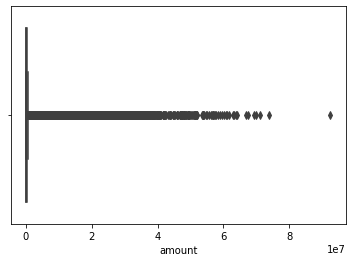

In [103]:
#plotting box plot
sns.boxplot(df['amount'])

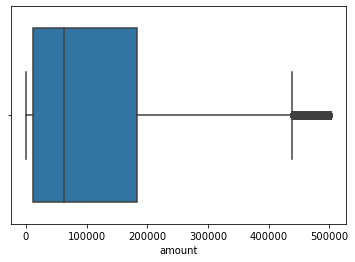

<AxesSubplot:xlabel='amount', ylabel='Density'>

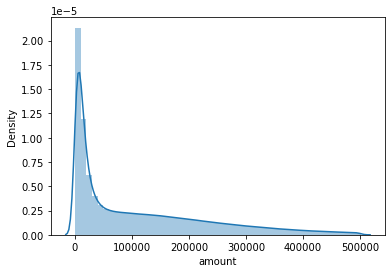

In [104]:
#formula for outliers is 
#Q1-1.5(Q3-Q1) and 
#Q3+1.5(Q3-Q1)

#for amount

percentile25 = df['amount'].quantile(0.25)
percentile75 = df['amount'].quantile(0.75)

upper_limit = percentile75 + 1.5 * (percentile75-percentile25)
lower_limit = percentile25 - 1.5 * ((percentile75-percentile25))

df[df['amount'] > upper_limit]
df[df['amount'] < lower_limit]

df = df[df['amount'] < upper_limit]
df.shape

#Respresnting graphs after removing outliers

import warnings
warnings.filterwarnings('ignore')

sns.boxplot(df['amount'])
plt.show()

sns.distplot(df['amount'])

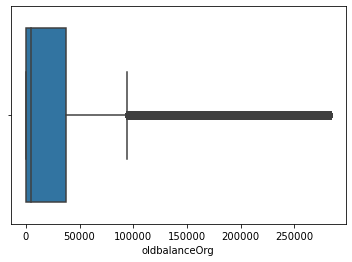

<AxesSubplot:xlabel='oldbalanceOrg', ylabel='Density'>

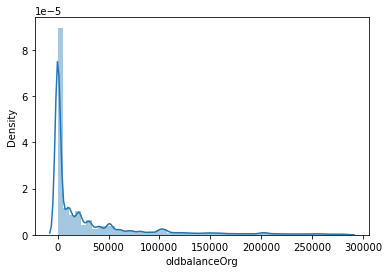

In [77]:
#formula for outliers is 
#Q1-1.5(Q3-Q1) and 
#Q3+1.5(Q3-Q1)

#for oldbalanceOrg
percentile25 = df['oldbalanceOrg'].quantile(0.25)
percentile75 = df['oldbalanceOrg'].quantile(0.75)

upper_limit = percentile75 + 1.5 * (percentile75-percentile25)
lower_limit = percentile25 - 1.5 * ((percentile75-percentile25))

df[df['oldbalanceOrg'] > upper_limit]
df[df['oldbalanceOrg'] < lower_limit]

df = df[df['oldbalanceOrg'] < upper_limit]
df.shape

#represting graphs after removing outliers

import warnings 
warnings.filterwarnings('ignore')

sns.boxplot(df['oldbalanceOrg'])
plt.show()

sns.distplot(df['oldbalanceOrg'])

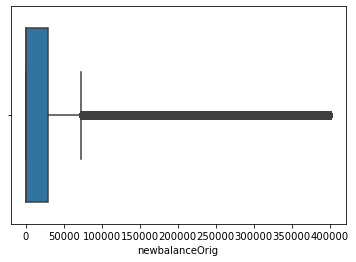

<AxesSubplot:xlabel='newbalanceOrig', ylabel='Density'>

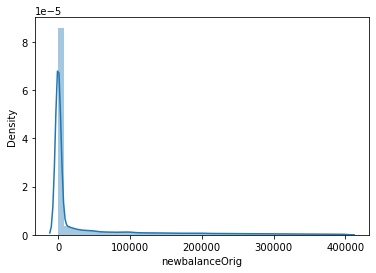

In [105]:

#formula for outliers is 
#Q1-1.5(Q3-Q1) and 
#Q3+1.5(Q3-Q1)

#for newbalanceOrig
percentile25 = df['newbalanceOrig'].quantile(0.25)
percentile75 = df['newbalanceOrig'].quantile(0.75)

upper_limit = percentile75 + 1.5 * (percentile75-percentile25)
lower_limit = percentile25 - 1.5 * ((percentile75-percentile25))

df[df['newbalanceOrig'] > upper_limit]
df[df['newbalanceOrig'] < lower_limit]

df = df[df['newbalanceOrig'] < upper_limit]
df.shape

#represting graphs after removing outliers

sns.boxplot(df['newbalanceOrig'])
plt.show()

sns.distplot(df['newbalanceOrig'])

# EXPLORATORY DATA ANALYSIS

In [79]:
#determining count of fraud and non-fraud transactions

data= df['isFraud'].value_counts()
data

0    4036378
1       3340
Name: isFraud, dtype: int64

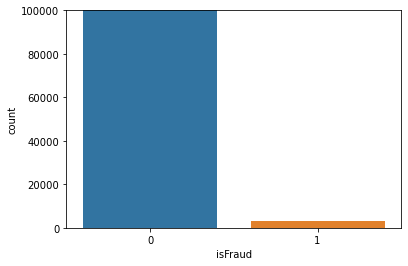

In [80]:
#plotting the frequency of fraud (1) and non-fraud (0) transactions

sns.countplot(x=df['isFraud'], data=df)
plt.ylim(0,100000)
plt.show()


In [81]:
#determining % of fraud and non- fraud transactions out of total transactions

df_0=df[df['isFraud']==0]
l1 = len(df_0)

df_1 = df[df['isFraud']==1]
l2 = len(df_1)

percent1 = (l1/(l1+l2))*100
percent2 = (l2/(l1+l2))*100

print(percent1, percent2)


99.91732096151266 0.08267903848733996


Non-fraud tranactions are way more than non-fraud transactions

In [82]:
#grouping data by fraud and non-fraud categories by mean

df.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,244.329241,105228.440618,16502.098036,4331.544993,895965.489562,1.004961e+06,0.0
1,362.246707,110116.097916,108757.859168,0.000000,488088.064368,5.487013e+05,0.0


# Observations 


1. The average step of people who were not involved in fraud transaction is less than the average step of those involved in fraud transactions.

2. The average amount involved in no- fraud transactions is less than fraud- transactions

3. The average initial balance before the transaction is 6 times more for fraud transactions

4. The average new balance after the transaction is about more for non-fraud transactions than for fraud ones



# Grouping by categorical variables

In [83]:
df.groupby('type').mean()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,
CASH_IN,249.357204,24660.112825,11609.646706,36269.759529,1.004261e+06,1.000196e+06,0.000000,0.0
CASH_OUT,241.770898,167535.372250,20073.384756,1257.126502,1.506606e+06,1.690952e+06,0.000829,0.0
DEBIT,249.952182,5709.726775,16490.801726,13426.751450,1.514597e+06,1.534913e+06,0.000000,0.0
PAYMENT,247.507145,13363.305406,12097.962838,7399.946817,0.000000e+00,0.000000e+00,0.000000,0.0
TRANSFER,243.839409,233802.678218,18900.916406,690.824893,1.733296e+06,1.983213e+06,0.006409,0.0


# Observations

1. Majorty of the transactions are conducted by Transfer (farud and non-fraud)
2. newbalanceOrig is the highest for cash in that means in a single transaction, the highest amount of money is transfered through cash in
3. For one transaction, the highest possibility of a fraud transaction is through cash out
4. Highest amount is paid through debit 

# VISUALIZATIONS

(1.0, 1000.0)

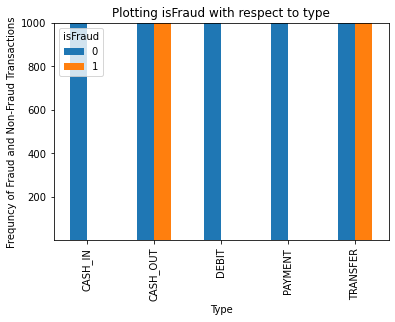

In [84]:
%matplotlib inline
pd.crosstab(df.type,df.isFraud).plot(kind='bar')
plt.title('Plotting isFraud with respect to type')
plt.xlabel('Type')
plt.ylabel('Frequncy of Fraud and Non-Fraud Transactions')
plt.ylim(1,1000)

Type seems to be a good predictor for predicting isFraud.

(0.0, 100.0)

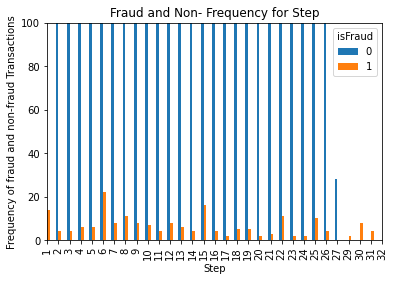

In [85]:
%matplotlib inline
pd.crosstab(df.step,df.isFraud).plot(kind='bar')
plt.title('Fraud and Non- Frequency for Step')
plt.xlabel('Step')
plt.ylabel('Frequency of fraud and non-fraud Transactions')
plt.xlim(0,30)
plt.ylim(0,100)

Step does not seem to be a good indicator for predicting. Hence, we will drop it from modelling dataset.

(0.0, 100000.0)

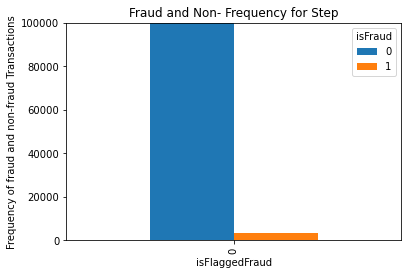

In [86]:
%matplotlib inline
pd.crosstab(df.isFlaggedFraud,df.isFraud).plot(kind='bar')
plt.title('Fraud and Non- Frequency for Step')
plt.xlabel('isFlaggedFraud')
plt.ylabel('Frequency of fraud and non-fraud Transactions')
plt.ylim(0,100000)


IsFlaggedFraud does not seem to be a good indicator for predicting. Hence, we will drop it from modelling dataset.

In [87]:
#getting dummy values for categorical data

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

#for type column

df['type']= label_encoder.fit_transform(df['type'])
  
df['type'].unique()

#for nameOrig column

df['nameOrig']= label_encoder.fit_transform(df['nameOrig'])
  
df['nameOrig'].unique()

#for nameDest column

df['nameDest']= label_encoder.fit_transform(df['nameDest'])
  
df['nameDest'].unique()



array([1391246,  380703,  339095, ...,  190552,  443362,  208208])

In [88]:
#dropping target variable from the dataset and storing it in another variable

x= df.drop(['isFraud', 'step', 'isFlaggedFraud'], axis=1)
y=df['isFraud']


# TRAIN AND TEST DATA

In [89]:
#training and testing data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#applying logistic regression on the training dataset
logreg = LogisticRegression(max_iter = 1000000000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=1000000000)

In [90]:
#predicting values and determining accuracy

y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set is:', logreg.score(x_test, y_test))

Accuracy of logistic regression classifier on test set is: 0.9993902217645447


# MODEL EVALUATION

In [91]:
#evaluation using confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1210788     119]
 [    620     389]]


# This means we have 1210788 +119 = 12,10,907 correct predictions and     620+398 = 1018 incorrect predictions

In [92]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

0.9993902217645447
0.765748031496063
0.3855302279484638


1. We got 99.9% accuracy, which is great.


2. Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In our prediction case, when your Logistic Regression model predicted fraud transactions, fraud transactions are 76% of the time.


3. Recall: If there are fraud transactions in the test set and our Logistic Regression model can identify it 38% of the time.